#### Import Libraries

In [1]:
import xlwings as xw
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

#### Create Connection to Excel Workbook and Sheet

In [2]:
path = r"C:\Users\tcregar\Desktop\Sorting Algorythems\Sorting_Algos.xlsm"

In [3]:
wb = xw.Book(path)

In [4]:
sheet = wb.sheets["Insertion_Sort"]

In [5]:
sheet2 = wb.sheets["Merge Sort"]

In [6]:
sheet3 = wb.sheets["Heap Sort"]

#### Define helper functions to get cell values and address information

In [6]:
def value_address(n):
    return f'C{n}'

In [7]:
def prev_value_address(n):
    x = int(n-1)
    return f'C{x}'

In [8]:
def sort_address(n):
    return f'D{n}'

In [9]:
def prev_sort_address(n):
    x = int(n-1)
    return f'D{x}'

In [10]:
def get_value(n):
    if n >=1 and n <= 52:
        return int(sheet.range(f'C{n}').value)
    else:
        return 3

In [11]:
def get_prev_value(n):
    x = n - 1
    if n >=4 and n <= 52:
        return int(sheet.range(f'C{x}').value)
    else:
        return int(sheet.range('C3').value)

#### Function to create random data and write to Excel

In [11]:
def build_new():
    data = list(range(1,51))
    random.shuffle(data)
    
    sheet.range("value").options(transpose = True).value = data

#### Define function to run insertion sort on generated data

In [18]:
def run_insertion_sort():    
    
    operations = 0
    
    for i in range(3,53):
        
        select_value = get_value(i)
        compare_value = get_prev_value(i)
        
        value_addr = value_address(i)
        sort_addr = sort_address(i)
        
        sheet.range("cur_element").value = select_value
               
        if i <= 3:
            sheet.range(value_addr).clear_contents()
            sheet.range(sort_addr).value = select_value
            sheet.range(sort_addr).clear_contents()
            sheet.range(value_addr).value = select_value
            
            operations += 1
            sheet.range("opp_cnt").value = operations
            sheet.range("cur_order").value = i
            
        elif select_value >= compare_value:
            sheet.range(value_addr).clear_contents()
            sheet.range(sort_addr).value = select_value
            sheet.range(sort_addr).clear_contents()
            sheet.range(value_addr).value = select_value
            
            operations += 1
            sheet.range("opp_cnt").value = operations
            sheet.range("cur_order").value = i
            
        else:
            
            sheet.range("cur_order").value = i
            target = i
            prev_value_addr = prev_value_address(i)
            prev_sort_addr = prev_sort_address(i)
            
            while select_value < compare_value:
                
                sheet.range(value_addr).clear_contents()
                sheet.range(sort_addr).value = select_value              
                sheet.range(value_addr).value = compare_value                
                sheet.range(prev_value_addr).clear_contents()     
                sheet.range(sort_addr).clear_contents()             
                sheet.range(prev_sort_addr).value = select_value          
                sheet.range(prev_sort_addr).clear_contents()          
                sheet.range(prev_value_addr).value = select_value 

                target = target - 1
                
                value_addr = value_address(target)
                sort_addr = sort_address(target)
                
                prev_value_addr = prev_value_address(target)
                prev_sort_addr = prev_sort_address(target)
                
                compare_value = get_prev_value(target)
                
                operations += 1
                sheet.range("opp_cnt").value = operations
                sheet.range("cur_order").value = target
                

            
                            
  

In [19]:
build_new()

In [20]:
run_insertion_sort()

### Merge Sort

#### Helper functions

In [63]:
def merge_sort_splits(data):  
    sheet2.range("start").value = data  
    sheet2.range("end").value = data 
    
    sheet2.range("split1").value = data[:13]  
    sheet2.range("split2").value = data[13:]    
    sheet2.range("split3").value = data[:6]  
    sheet2.range("split4").value = data[6:13]  
    sheet2.range("split5").value = data[13:19]   
    sheet2.range("split6").value = data[19:]   
    
    sheet2.range("split7").value = data[:3]
    sheet2.range("split8").value = data[3:6]
    sheet2.range("split9").value = data[6:10]
    sheet2.range("split10").value = data[10:13]
    sheet2.range("split11").value = data[13:16]
    sheet2.range("split12").value = data[16:19]
    sheet2.range("split13").value = data[19:22]
    sheet2.range("split14").value = data[22:]
    
    sheet2.range("split15").value = data[:2]
    sheet2.range("split16").value = data[2]
    sheet2.range("split17").value = data[3:5]
    sheet2.range("split18").value = data[5] 
    sheet2.range("split19").value = data[6:8]
    sheet2.range("split20").value = data[8:10]
    sheet2.range("split21").value = data[10:12]
    sheet2.range("split22").value = data[12]
    
    sheet2.range("split23").value = data[13:15]
    sheet2.range("split24").value = data[15]
    sheet2.range("split25").value = data[16:18]
    sheet2.range("split26").value = data[18]
    sheet2.range("split27").value = data[19:21]
    sheet2.range("split28").value = data[21]
    sheet2.range("split29").value = data[22:24]
    sheet2.range("split30").value = data[24]    
    
    
    
    sheet2.range("id_0").value = data[0]
    sheet2.range("id_1").value = data[1]
    sheet2.range("id_2").value = data[2]
    sheet2.range("id_3").value = data[3]
    sheet2.range("id_4").value = data[4]
    sheet2.range("id_5").value = data[5]
    sheet2.range("id_6").value = data[6]
    sheet2.range("id_7").value = data[7]
    sheet2.range("id_8").value = data[8]
    sheet2.range("id_9").value = data[9]
    sheet2.range("id_10").value = data[10]
    sheet2.range("id_11").value = data[11]
    sheet2.range("id_12").value = data[12]
    sheet2.range("id_13").value = data[13]
    sheet2.range("id_14").value = data[14]
    sheet2.range("id_15").value = data[15]
    sheet2.range("id_16").value = data[16]
    sheet2.range("id_17").value = data[17]
    sheet2.range("id_18").value = data[18]
    sheet2.range("id_19").value = data[19]
    sheet2.range("id_20").value = data[20]
    sheet2.range("id_21").value = data[21]
    sheet2.range("id_22").value = data[22]
    sheet2.range("id_23").value = data[23]
    sheet2.range("id_24").value = data[24]
    

In [64]:
def merge_sort_M1():
    
    s1_a = sheet2.range("s1_a").value
    s1_a.sort()
    sheet2.range("m1_a").value = s1_a
    sheet2.range("end")[:2].value = s1_a
    
    s1_b = sheet2.range("split16").value
    sheet2.range("m1_b").value = s1_b

    s1_c = sheet2.range("s1_c").value
    s1_c.sort()
    sheet2.range("m1_c").value = s1_c
    sheet2.range("end")[3:5].value = s1_c
    
    s1_d = sheet2.range("split18").value
    sheet2.range("m1_d").value = s1_d
    
    s1_e = sheet2.range("s1_e").value
    s1_e.sort()
    sheet2.range("m1_e").value = s1_e
    sheet2.range("end")[6:8].value = s1_e
    
    s1_f = sheet2.range("s1_f").value
    s1_f.sort()
    sheet2.range("m1_f").value = s1_f
    sheet2.range("end")[8:10].value = s1_f
    
    s1_g = sheet2.range("s1_g").value
    s1_g.sort()
    sheet2.range("m1_g").value = s1_g
    sheet2.range("end")[10:12].value = s1_g
    
    s1_h = sheet2.range("split22").value
    sheet2.range("m1_h").value = s1_h   
    
    s1_i = sheet2.range("s1_i").value
    s1_i.sort()
    sheet2.range("m1_i").value = s1_i
    sheet2.range("end")[13:15].value = s1_i
    
    s1_j = sheet2.range("split24").value
    sheet2.range("m1_j").value = s1_j
    
    s1_k = sheet2.range("s1_k").value
    s1_k.sort()
    sheet2.range("m1_k").value = s1_k
    sheet2.range("end")[16:18].value = s1_k
    
    s1_l = sheet2.range("split26").value
    sheet2.range("m1_l").value = s1_l
    
    s1_m = sheet2.range("s1_m").value
    s1_m.sort()
    sheet2.range("m1_m").value = s1_m
    sheet2.range("end")[19:21].value = s1_m
    
    s1_n = sheet2.range("split28").value
    sheet2.range("m1_n").value = s1_n
    
    s1_o = sheet2.range("s1_o").value
    s1_o.sort()
    sheet2.range("m1_o").value = s1_o
    sheet2.range("end")[22:24].value = s1_o
    
    s1_p = sheet2.range("split30").value
    sheet2.range("m1_p").value = s1_p
    

In [65]:
def merge_sort_M2():
    
    s2_a = sheet2.range("s2_a").value
    s2_a.sort()
    sheet2.range("m2_a").value = s2_a
    sheet2.range("end")[:3].value = s2_a
    
  
    s2_b = sheet2.range("s2_b").value
    s2_b.sort()
    sheet2.range("m2_b").value = s2_b
    sheet2.range("end")[3:5].value = s2_b    
    
    
    s2_c = sheet2.range("s2_c").value
    s2_c.sort()
    sheet2.range("m2_c").value = s2_c
    sheet2.range("end")[6:9].value = s2_c   
    
    
    s2_d = sheet2.range("s2_d").value
    s2_d.sort()
    sheet2.range("m2_d").value = s2_d
    sheet2.range("end")[10:12].value = s2_d   
    
    
    s2_e = sheet2.range("s2_e").value
    s2_e.sort()
    sheet2.range("m2_e").value = s2_e
    sheet2.range("end")[13:15].value = s2_e   
    
    
    s2_f = sheet2.range("s2_f").value
    s2_f.sort()
    sheet2.range("m2_f").value = s2_f
    sheet2.range("end")[16:18].value = s2_f
    
    s2_g = sheet2.range("s2_g").value
    s2_g.sort()
    sheet2.range("m2_g").value = s2_g
    sheet2.range("end")[19:21].value = s2_g
    
    s2_h = sheet2.range("s2_h").value
    s2_h.sort()
    sheet2.range("m2_h").value = s2_h
    sheet2.range("end")[22:].value = s2_h
    
    

In [66]:
def merge_sort_M3():
    
    s3_a = sheet2.range("s3_a").value
    s3_a.sort()
    sheet2.range("m3_a").value = s3_a
    sheet2.range("end")[:6].value = s3_a  
    
    s3_b = sheet2.range("s3_b").value
    s3_b.sort()
    sheet2.range("m3_b").value = s3_b
    sheet2.range("end")[6:13].value = s3_b  
    
    s3_c = sheet2.range("s3_c").value
    s3_c.sort()
    sheet2.range("m3_c").value = s3_c
    sheet2.range("end")[13:19].value = s3_c
    
    s3_d = sheet2.range("s3_d").value
    s3_d.sort()
    sheet2.range("m3_d").value = s3_d
    sheet2.range("end")[19:].value = s3_d
    
    

In [67]:
def merge_sort_M4():
    
    s4_a = sheet2.range("s4_a").value
    s4_a.sort()
    sheet2.range("m4_a").value = s4_a
    sheet2.range("end")[:13].value = s4_a 
    
    s4_b = sheet2.range("s4_b").value
    s4_b.sort()
    sheet2.range("m4_b").value = s4_b
    sheet2.range("end")[13:].value = s4_b
    
    final = sheet2.range("end").value
    final.sort()
    sheet2.range("end").value = final
    

In [68]:
def build_new_25():
    data = list(range(1,26))
    random.shuffle(data) 
    
    return data

In [69]:
mege_sort_data = build_new_25()
print(mege_sort_data)

[11, 16, 22, 4, 15, 23, 5, 1, 17, 14, 25, 21, 3, 10, 18, 6, 24, 9, 20, 19, 7, 2, 12, 8, 13]


In [70]:
merge_sort_splits(mege_sort_data)
merge_sort_M1()
merge_sort_M2()
merge_sort_M3()
merge_sort_M4()

### HEAP SORT

https://www.youtube.com/watch?v=76EfufTQ1Pk&t=3s

Class(Value, Index, Workbook, Worksheet, Cell)

In [92]:
def max_heapify(array,split, i):
    
    left = 2 * i + 1
    right = 2 * i + 2
    
    if left < split and array[left] > array[i]:
        largest = left
    else: 
        largest = i
        
    if right < split and array[right] > array[largest]:
        largest = right
        
    if largest != i:
        
        sheet3.range("hs_av").value = array[i]               ####
        sheet3.range("hs_cfs").value = array[largest]        ####
        
        i_cell = f'hs_{i}'                                   ####
        largest_cell = f'hs_{largest}'                       ####
        
        sheet3.range(i_cell).value = array[largest]          ####
        sheet3.range(largest_cell).value = array[i]          ####
                
        array[i], array[largest] = array[largest], array[i]
        max_heapify(array, split, largest)

In [145]:
def build_max_heap(array):
    
    split = len(array)
    
    for i in range(split, -1, -1):
        max_heapify(array, split, i)
        
    for i in range(split - 1, 0, -1):
        
        sheet3.range("hs_av").value = array[0]         ####
        sheet3.range("hs_cfs").value = array[i]        ####

        i_cell = f'hs_{i}'                             ####
        sheet3.range("hs_0").value = array[i]          ####
        sheet3.range(i_cell).value = array[0]          ####      
        
        array[0], array[i] = array[i], array[0]
        max_heapify(array, i, 0)    
        
    #return array

In [149]:
def build_heap_data():
    data = list(range(0,63))
    random.shuffle(data) 
    
    sheet3.range("hs_array").value = data
    
    sheet3.range("hs_av").value = 0        ####
    sheet3.range("hs_cfs").value = 0       ####
    
    
    order = list(range(0,63))
    y_pos = np.arange(len(data))
    
    fig = plt.figure(figsize=(20,5))
    
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, order)
    plt.xlim(-0.5,len(data)-.5)
    plt.ylabel('Element')
    plt.xlabel('Order')
    plt.title('HEAP SORT')
    
    return data

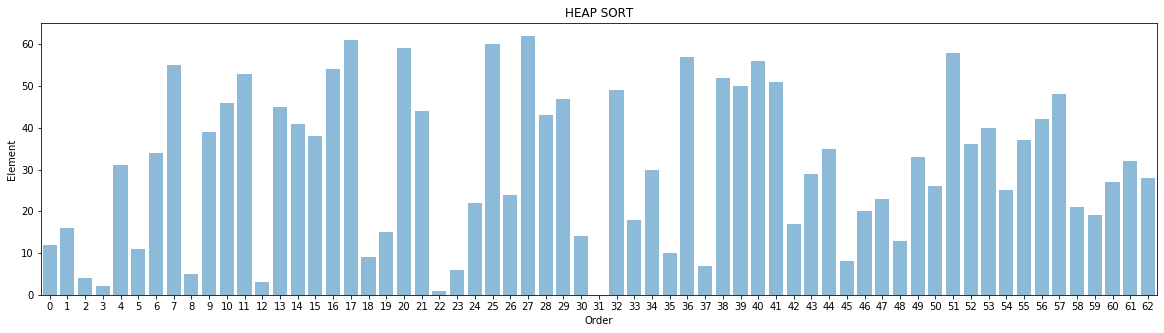

In [150]:
hs_data = build_heap_data()

In [151]:
build_max_heap(hs_data)